# 1. Hücre: Gerekli Kütüphaneleri Yükleme

In [10]:
# Gerekli kütüphanelerin yüklenmesi
# Bu kütüphaneler veri analizi, model eğitimi, model değerlendirmesi ve grafik çizimi için kullanılır.
import pandas as pd  # Veri işlemleri ve analizleri için
from sklearn.model_selection import train_test_split  # Veriyi eğitim ve test setlerine ayırmak için
from sklearn.tree import DecisionTreeClassifier  # Karar Ağacı sınıflandırıcısını kullanmak için
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes sınıflandırıcısını kullanmak için
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay  # Performans metrikleri ve karışıklık matrisi için
import matplotlib.pyplot as plt  # Grafik çizimleri için


# 2. Hücre: Veriseti Yükleme Fonksiyonu

In [11]:
# WineQT.csv dosyasından veriseti yükleniyor
# Bu adımda, şarap kalitesine dair kimyasal özellikler içeren veriseti yüklenir.
# Verisetinin dosya yolunun doğru olduğundan emin olun.
dataset = pd.read_csv('WineQT.csv')  # Veriseti WineQT.csv dosyasından yüklenir ve "dataset" değişkenine atanır


# 3. Hücre: Veriseti İnceleme Fonksiyonu

In [12]:
# Verisetinin başlıklarını ve temel istatistiksel bilgilerini inceleme
# Verisetini anlamak için ilk adım, veri yapısına göz atmaktır.

print("Veriseti Başlıkları:")
print(dataset.head())  # Verisetinin ilk 5 satırını görüntüler, böylece sütun başlıklarını ve veri örneklerini görebilirsiniz.

print("\nVeriseti Açıklaması:")
print(dataset.describe())  # Verinin istatistiksel özelliklerini (ortalama, standart sapma, minimum, maksimum vb.) gösterir.

print("\nSınıf Dağılımı:")
print(dataset.iloc[:, -1].value_counts())  # Sınıf dağılımını görmek için verisetinin son sütunundaki (hedef etiket) verileri sayar.


Veriseti Başlıkları:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8   

# 4. Hücre: Model Eğitme Fonksiyonu


In [13]:
# Veriseti özellikler (X) ve etiketler (y) olarak ayırma
# Bu adımda, veriyi bağımsız değişkenler (X) ve hedef (y) olarak ayırıyoruz.
# X: Şarapların kimyasal özellikleri, y: Şarap kalitesini ifade eden etiket.

X = dataset.iloc[:, :-1]  # Son sütun dışındaki tüm sütunlar özelliklerdir (bağımsız değişkenler)
y = dataset.iloc[:, -1]   # Son sütun etiketlerdir (bağımlı değişken - kalite puanı)

# Verisetini eğitim ve test setlerine bölme (test seti %20)
# Modelin başarısını test etmek için veriyi eğitim ve test olarak ikiye ayırıyoruz.
# test_size=0.2: Verisetinin %20'si test için ayrılır.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# 5. Hücre: Model Değerlendirme Fonksiyonu

In [14]:
# Karar Ağacı modelini başlat ve eğit
# Karar Ağacı, bir sınıflandırma algoritmasıdır ve verinin belirli özelliklerine göre kararlar vererek sınıflandırma yapar.

dt_model = DecisionTreeClassifier()  # Karar Ağacı sınıflandırıcısı başlatılır
dt_model.fit(X_train, y_train)  # Model, eğitim verisi ile eğitilir (X_train: özellikler, y_train: etiketler)

DecisionTreeClassifier()

# 6. Hücre: Ana Fonksiyon

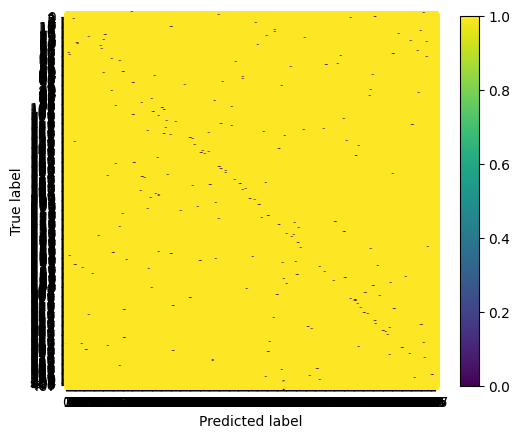

Karar Ağacı Modeli Doğruluk: 0.0


In [20]:
# Karar Ağacı modelinin test verileri üzerindeki tahminlerini yapma
y_pred_dt = dt_model.predict(X_test)

# Karar Ağacı modeli için Karışıklık Matrisi
cm_dt = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(confusion_matrix=cm_dt).plot()
plt.show()

# Karar Ağacı modelinin performans metrikleri
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# zero_division parametresi ekleniyor, bu sayede hatalı sınıflar tanımlı hale getiriliyor
precision_dt = precision_score(y_test, y_pred_dt, average='weighted', zero_division=0)
recall_dt = recall_score(y_test, y_pred_dt, average='weighted', zero_division=0)

print(f"Karar Ağacı Modeli Doğruluk: {accuracy_dt}")


In [18]:
print(f"Karar Ağacı Modeli F1 Skoru: {f1_dt}")


Karar Ağacı Modeli F1 Skoru: 0.0


In [19]:
print(f"Karar Ağacı Modeli Hassasiyet (Precision): {precision_dt}")


Karar Ağacı Modeli Hassasiyet (Precision): 0.0


In [21]:
print(f"Karar Ağacı Modeli Geri Çağırma (Recall): {recall_dt}")

Karar Ağacı Modeli Geri Çağırma (Recall): 0.0


# 7. Hücre: Naive Bayes Modeli Eğitme

In [22]:
# Naive Bayes modelini başlat ve eğit
# Naive Bayes, olasılık temelli bir sınıflandırma algoritmasıdır. Gaussian dağılıma dayalıdır.

nb_model = GaussianNB()  # Gaussian Naive Bayes sınıflandırıcısı başlatılır
nb_model.fit(X_train, y_train)  # Model, eğitim verisi ile eğitilir (X_train: özellikler, y_train: etiketler)


GaussianNB()

# 8. Hücre: Naive Bayes Modelini Değerlendirme

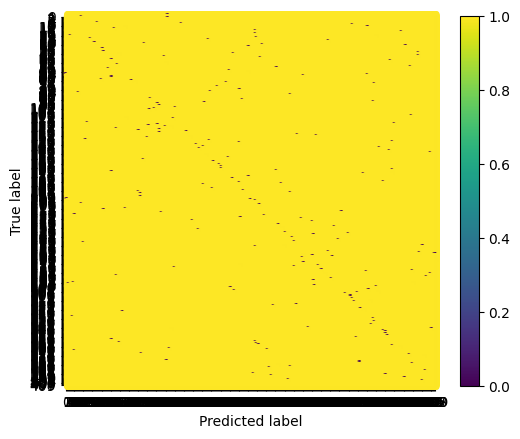

Naive Bayes Modeli Doğruluk: 0.0


In [23]:
# Naive Bayes modelinin test verileri üzerindeki tahminlerini yapma
y_pred_nb = nb_model.predict(X_test)

# Naive Bayes modeli için Karışıklık Matrisi
cm_nb = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(confusion_matrix=cm_nb).plot()
plt.show()

# Naive Bayes modelinin performans metrikleri
accuracy_nb = accuracy_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

# zero_division parametresi ekleniyor, bu sayede hatalı sınıflar tanımlı hale getiriliyor
precision_nb = precision_score(y_test, y_pred_nb, average='weighted', zero_division=0)
recall_nb = recall_score(y_test, y_pred_nb, average='weighted', zero_division=0)

print(f"Naive Bayes Modeli Doğruluk: {accuracy_nb}")

In [24]:
print(f"Naive Bayes Modeli F1 Skoru: {f1_nb}")


Naive Bayes Modeli F1 Skoru: 0.0


In [25]:
print(f"Naive Bayes Modeli Hassasiyet (Precision): {precision_nb}")


Naive Bayes Modeli Hassasiyet (Precision): 0.0


In [26]:
print(f"Naive Bayes Modeli Geri Çağırma (Recall): {recall_nb}")

Naive Bayes Modeli Geri Çağırma (Recall): 0.0


# 9. Hücre: Sonuçlarını karşılaştırma

In [27]:
# Karar Ağacı ve Naive Bayes modellerinin performans karşılaştırması
# Her iki modelin doğruluk ve F1 skorları karşılaştırılır.

print("\nModellerin Karşılaştırılması:")


Modellerin Karşılaştırılması:


In [28]:
print(f"Karar Ağacı - Doğruluk: {accuracy_dt}, F1: {f1_dt}")

Karar Ağacı - Doğruluk: 0.0, F1: 0.0


In [29]:
print(f"Naive Bayes - Doğruluk: {accuracy_nb}, F1: {f1_nb}")

Naive Bayes - Doğruluk: 0.0, F1: 0.0
